# UMAPs Neurips samples, NK cells

In this notebook known NK cell markers are plotted in scatterplots to see if there are any correlation between their expression. 

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



In [125]:
#Neurips
adata_neurips = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_neurips_norm_outer.h5ad')

In [126]:
#To find gene names

result = [i for i in adata_neurips.var_names if i.startswith('TC')]
print(result)

['TC2N', 'TCAF1', 'TCAF2', 'TCAIM', 'TCAP', 'TCEA1', 'TCEA2', 'TCEA3', 'TCEAL1', 'TCEAL2', 'TCEAL3', 'TCEAL4', 'TCEAL5', 'TCEAL7', 'TCEAL8', 'TCEAL9', 'TCEANC', 'TCEANC2', 'TCEB1', 'TCEB2', 'TCEB3', 'TCEB3-AS1', 'TCERG1', 'TCF12', 'TCF15', 'TCF19', 'TCF20', 'TCF23', 'TCF25', 'TCF3', 'TCF4', 'TCF4-AS2', 'TCF7', 'TCF7L1', 'TCF7L2', 'TCFL5', 'TCHH', 'TCHP', 'TCIRG1', 'TCL1A', 'TCL1B', 'TCL6', 'TCN2', 'TCOF1', 'TCP1', 'TCP10L', 'TCP11', 'TCP11L1', 'TCP11L2', 'TCTA', 'TCTE1', 'TCTE3', 'TCTEX1D1', 'TCTEX1D2', 'TCTEX1D4', 'TCTN1', 'TCTN2', 'TCTN3']


In [127]:
#Both NK cell types selected

neurips_nk = adata_neurips[(adata_neurips.obs['cell_type'] == "NK") | (adata_neurips.obs['cell_type'] == "NK CD158e1+")]

In [128]:
neurips_nk

View of AnnData object with n_obs × n_vars = 7388 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    layers: 'counts'

In [129]:
neurips_nk_prot=neurips_nk.obsm['protein_expression_clr_neurips']

In [130]:
#To exclude columns that contain only zeros

neurips_nk_prot = pd.DataFrame(neurips_nk_prot)
neurips_nk_prot != 0
(neurips_nk_prot != 0).any(axis=0)
neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]
neurips_nk_prot = neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]

In [131]:
samples=adata_neurips.obs['POOL'].unique().tolist()

In [132]:
prot=neurips_nk.obsm['protein_expression_clr_neurips']

In [133]:
#some proteins and genes have same names, here _prot added after protein names
prot=prot.rename(columns={'CD2': 'CD2_prot', 'CX3CR1': 'CX3CR1_prot', 'CD226':'CD226_prot', 'TIGIT':'TIGIT_prot', 'CD27':'CD27_prot', 'CD38': 'CD38_prot', 'CD224': 'CD224_prot', 'CD7': 'CD7_prot', 'CD44': 'CD44_prot', 'CD34': 'CD34_prot','CD5': 'CD5_prot'})


In [134]:
#adding protein information to obs

a = neurips_nk.obs
b = prot

adata_eg=pd.concat([a, b], axis=1)
neurips_nk.obs=adata_eg


In [135]:
neurips_nk


AnnData object with n_obs × n_vars = 7388 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40', 'CD154', 'CD52', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'HLA-A-B-C', 'CD45RA', 'CD123', 'CD7_prot', 'CD105', 'CD49f', 'CD194', 'CD4', 'CD44_prot', 'CD14', 'CD16', 'CD25',

In [136]:
neurips_nk.obs['POOL'].unique().to_list()

['s4d1',
 's3d6',
 's1d2',
 's2d1',
 's3d7',
 's2d4',
 's1d1',
 's4d9',
 's4d8',
 's2d5',
 's3d1',
 's1d3']

In [137]:
#selecting one sample from Neurips, only NK cells

eg=neurips_nk[neurips_nk.obs['POOL'] == "s1d2"]


In [138]:
eg

View of AnnData object with n_obs × n_vars = 518 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40', 'CD154', 'CD52', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'HLA-A-B-C', 'CD45RA', 'CD123', 'CD7_prot', 'CD105', 'CD49f', 'CD194', 'CD4', 'CD44_prot', 'CD14', 'CD16', 

In [139]:
#Computing a neighborhood of observations using latent space

sc.pp.neighbors(eg, use_rep="X_totalVI")   #indicated representation

sc.tl.umap(eg)

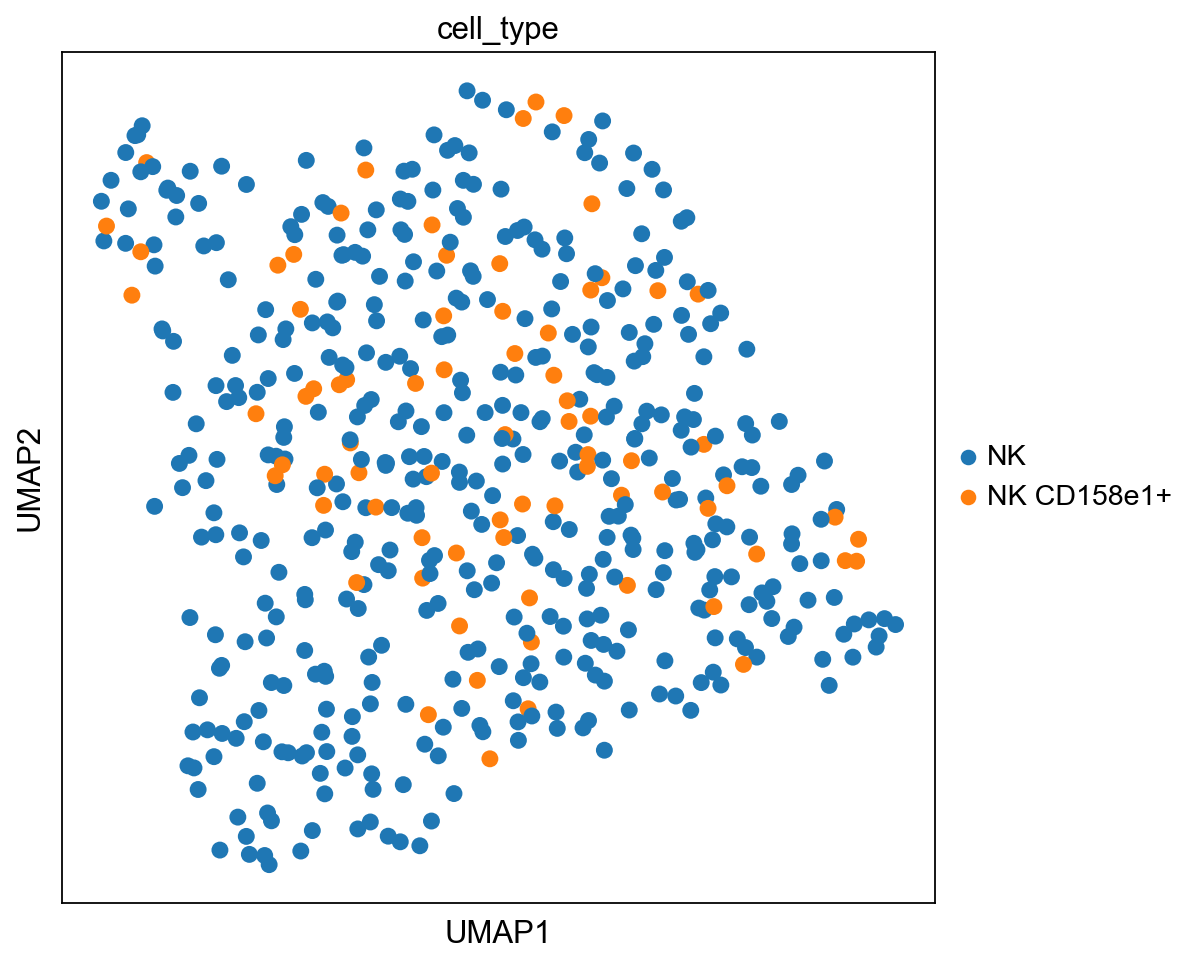

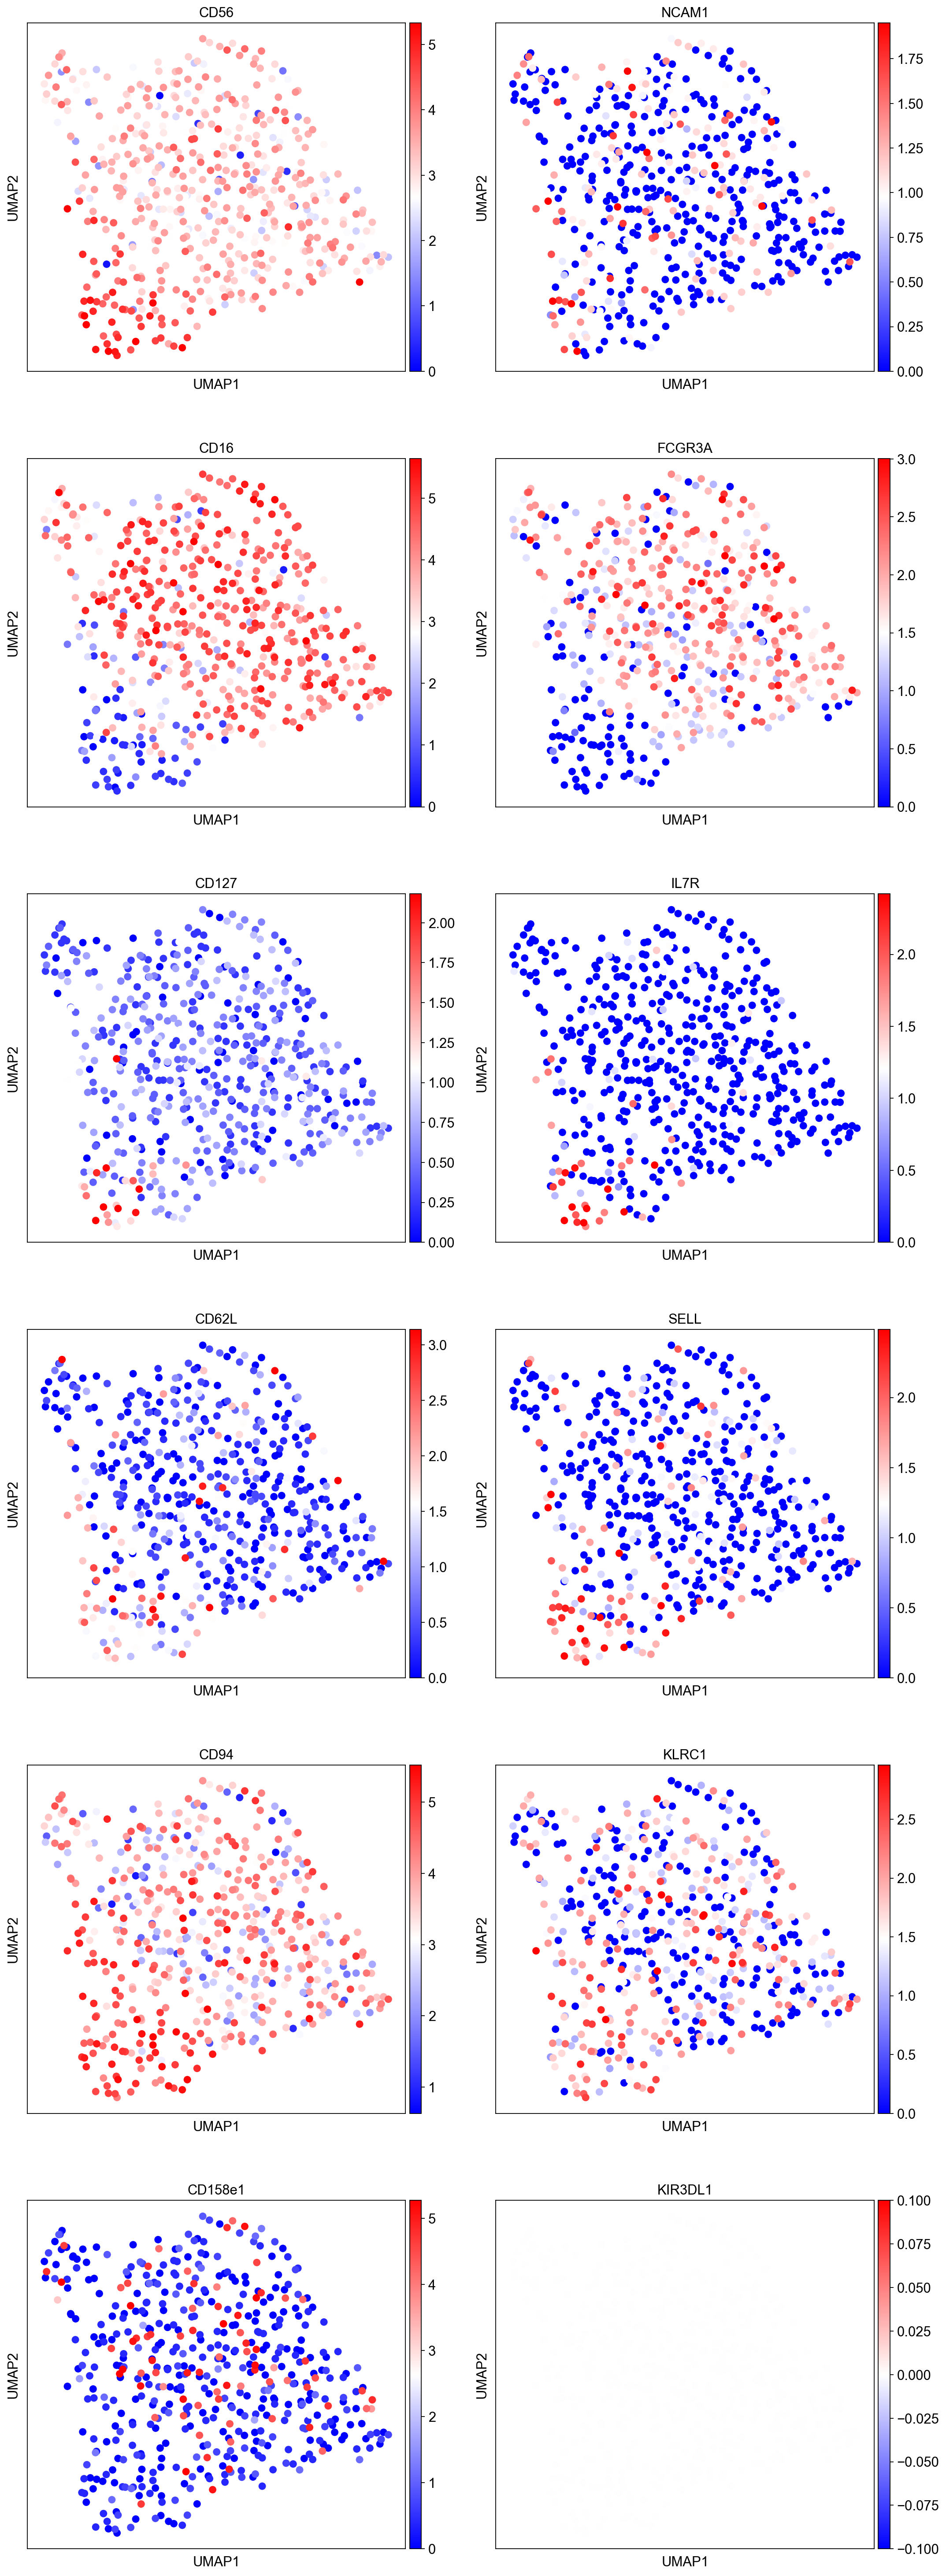

In [140]:
sc.set_figure_params(figsize=(7, 7))

markers= ['CD56', 'NCAM1', 'CD16','FCGR3A', 'CD127', 'IL7R','CD62L','SELL', 'CD94', 'KLRC1', 'CD158e1', 'KIR3DL1']

sc.pl.umap(eg, color = ['cell_type'], color_map = 'viridis', )

#RNA
sc.pl.umap(eg, color = markers, vmax="p99", color_map = 'bwr', ncols=2, legend_fontsize = 20)

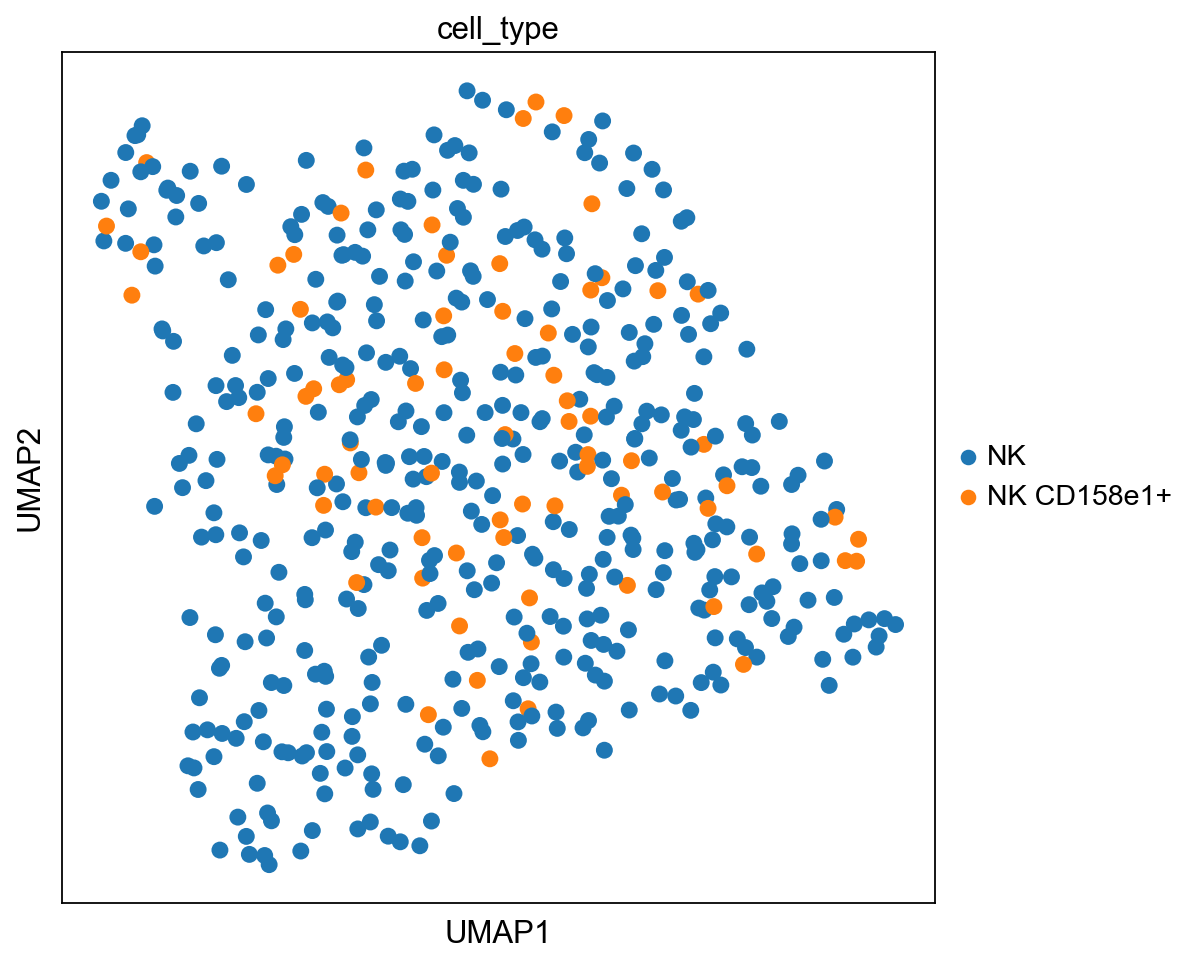

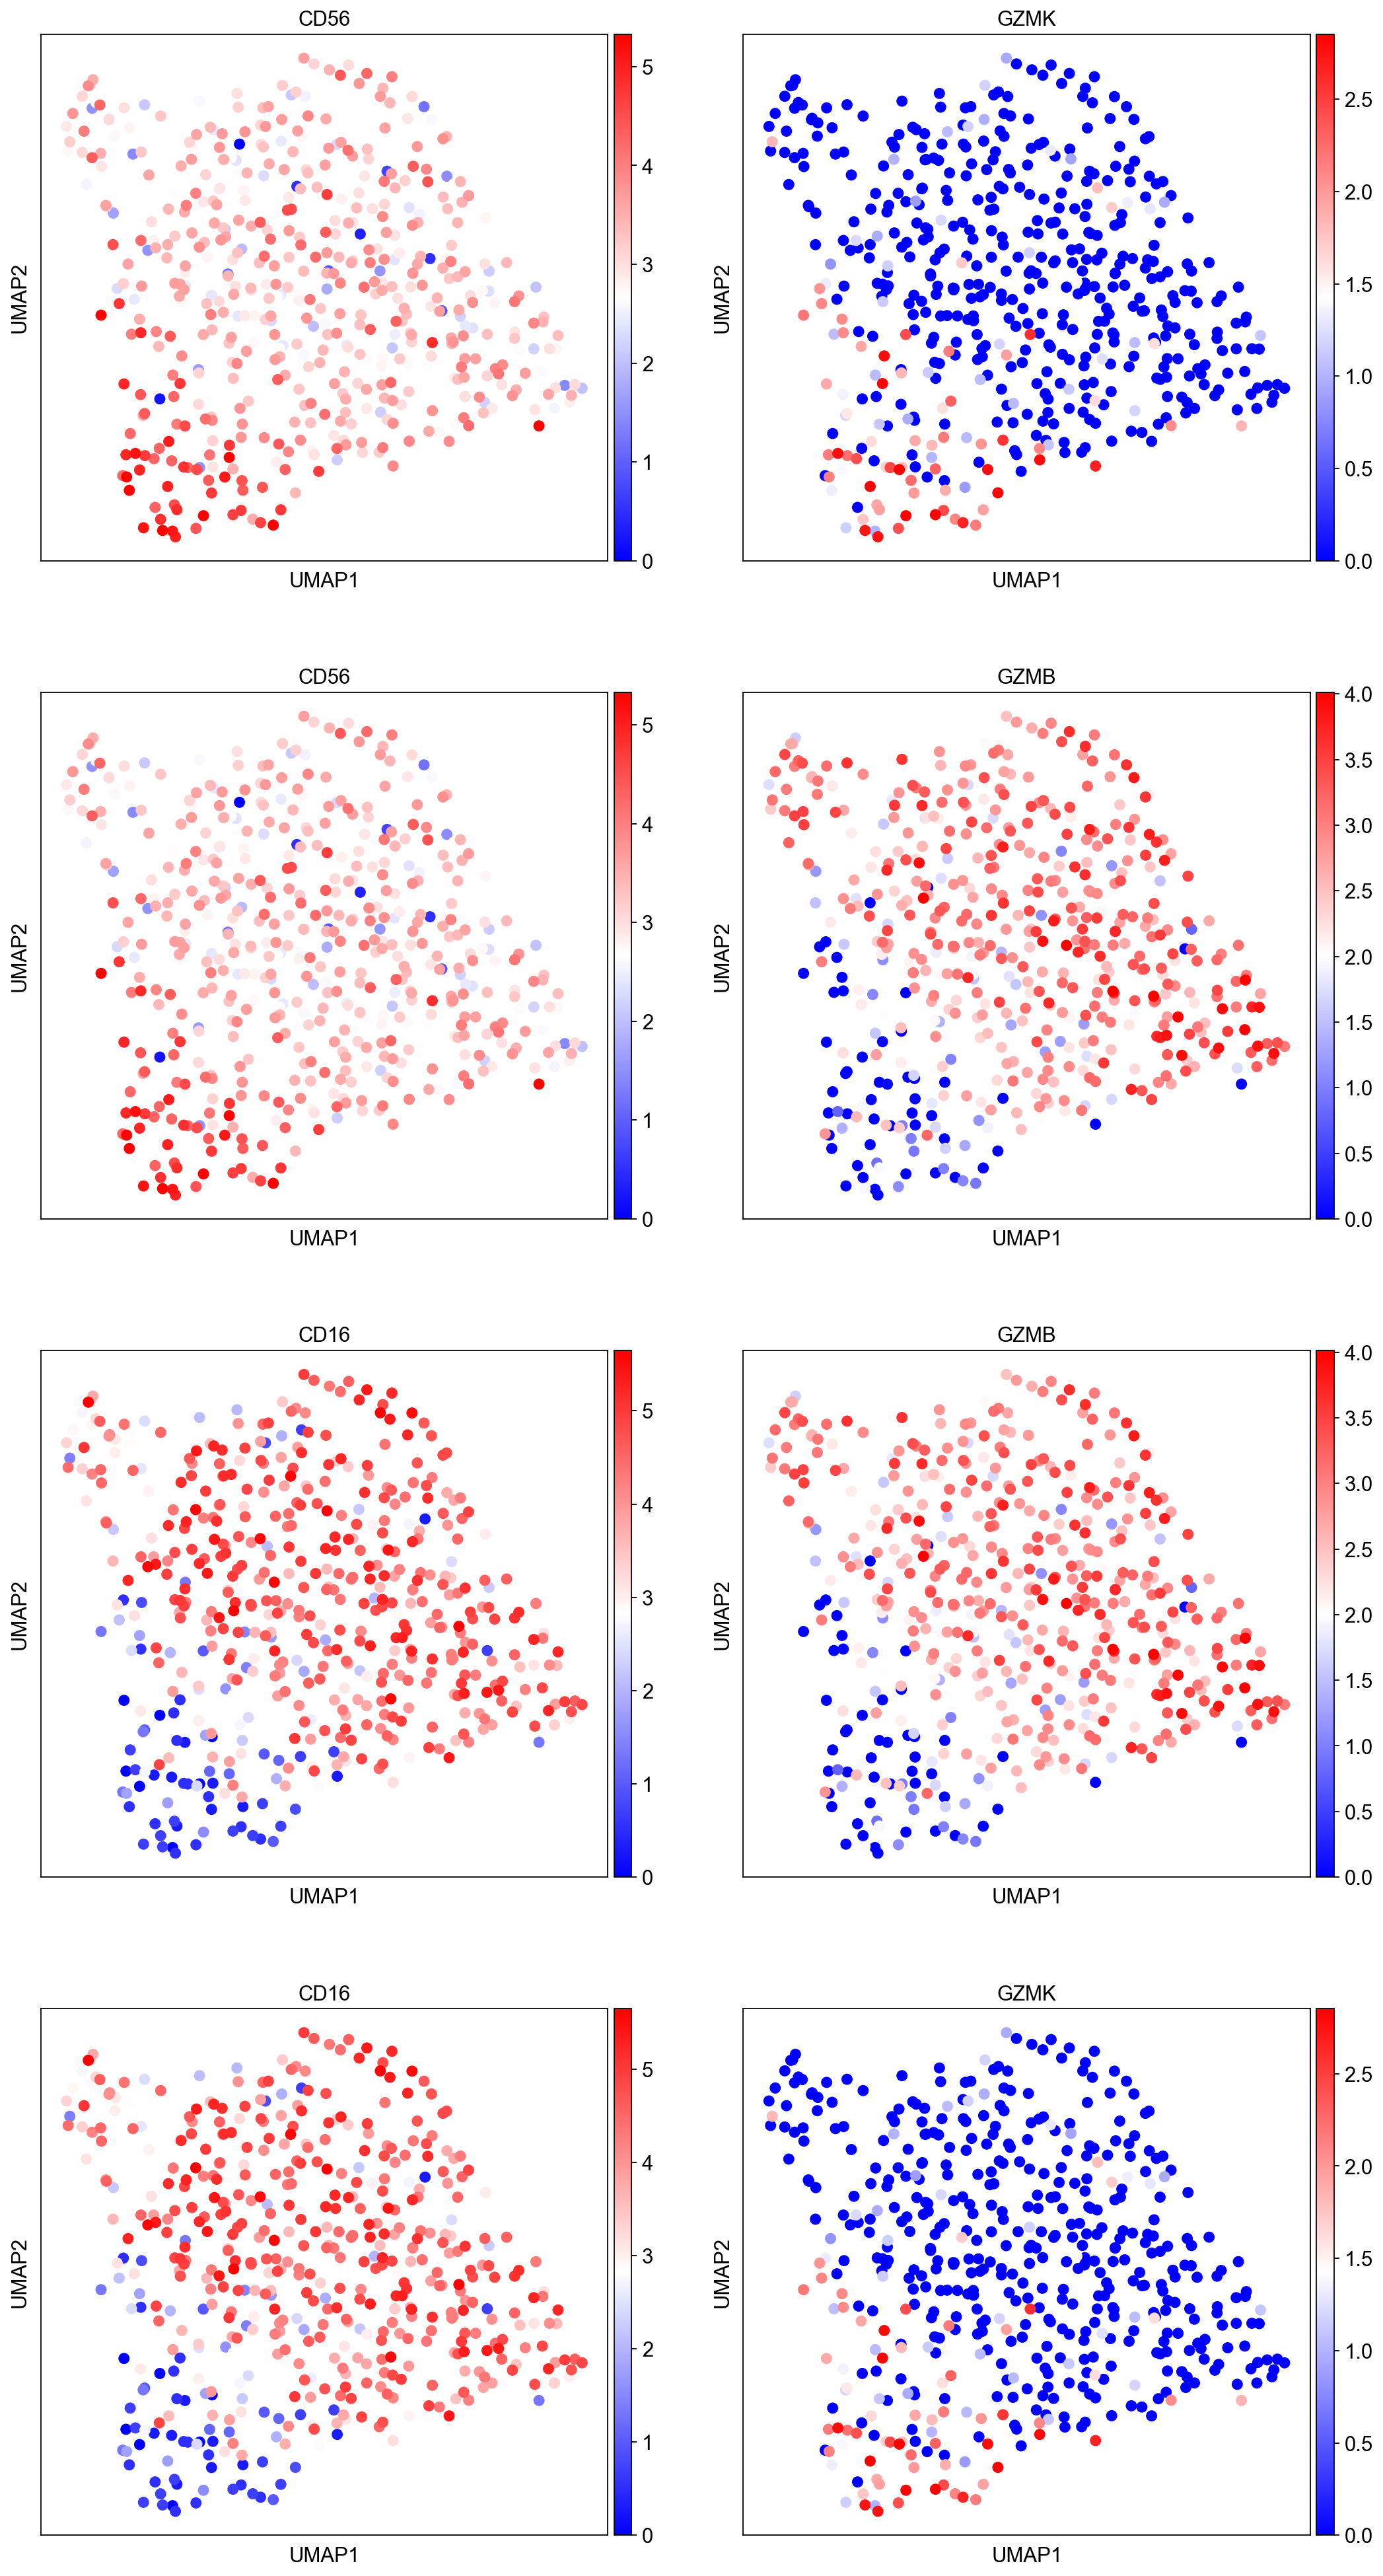

In [141]:
sc.set_figure_params(figsize=(7, 7))

markers= ['CD56', 'GZMK', 'CD56', 'GZMB', 'CD16', 'GZMB', 'CD16', 'GZMK']

sc.pl.umap(eg, color = ['cell_type'], color_map = 'viridis')

#RNA
sc.pl.umap(eg, color = markers, vmax="p99", color_map = 'bwr', ncols=2)

# Protein vs protein/RNA scatterplots

In [142]:
X = eg.to_df()

X.shape

(518, 21720)

In [143]:
prot_nk = eg.obsm['protein_expression_clr_neurips']

prot_nk.shape

(518, 139)

In [144]:
#To exclude columns that contain only zeros

#prot_nk = pd.DataFrame(prot_nk)
prot_nk != 0
(prot_nk != 0).any(axis=0)
prot_nk.loc[:, (prot_nk != 0).any(axis=0)]
prot_nk = prot_nk.loc[:, (prot_nk != 0).any(axis=0)]

In [145]:
prot_nk.shape

(518, 134)

In [146]:
df_comb = pd.concat([X,prot_nk], axis=1)

In [147]:
df_comb_cd16=df_comb.sort_values(by='CD16', ascending=True)

In [148]:
df_comb_cd16['CD16']

GGAATCTGTTGTGCCG-1-s1d2    0.000000
TTCAGGAAGATCACTC-1-s1d2    0.000000
CAAGCTAAGGTTCTTG-1-s1d2    0.000000
CGGACACCACTAAACC-1-s1d2    0.000000
TCCGGGACAACAAAGT-1-s1d2    0.000000
                             ...   
TGACGCGGTACTGCGC-1-s1d2    5.676116
GACTATGTCTCCCAAC-1-s1d2    5.694466
AAATGGACACACCAGC-1-s1d2    5.701261
AGAAGCGAGTGATGGC-1-s1d2    5.788746
CATACAGGTACAGAAT-1-s1d2    5.864407
Name: CD16, Length: 518, dtype: float64

Text(0.5, 0, 'CD56')

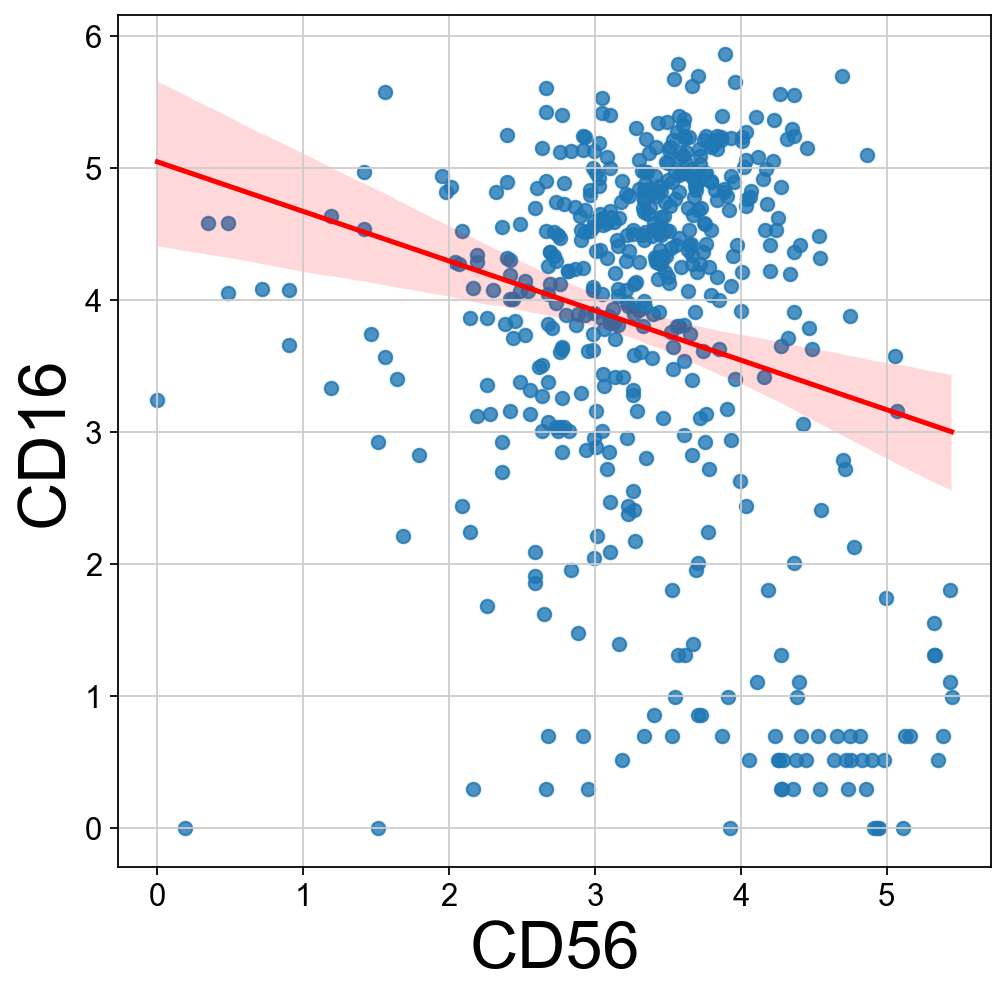

In [149]:
a = sns.regplot(data=df_comb_cd16, x='CD56' , y='CD16', 
                line_kws = {"color": "red"})
a.set_ylabel("CD16",fontsize=30)
a.set_xlabel("CD56",fontsize=30)

Text(0.5, 0, 'CD94')

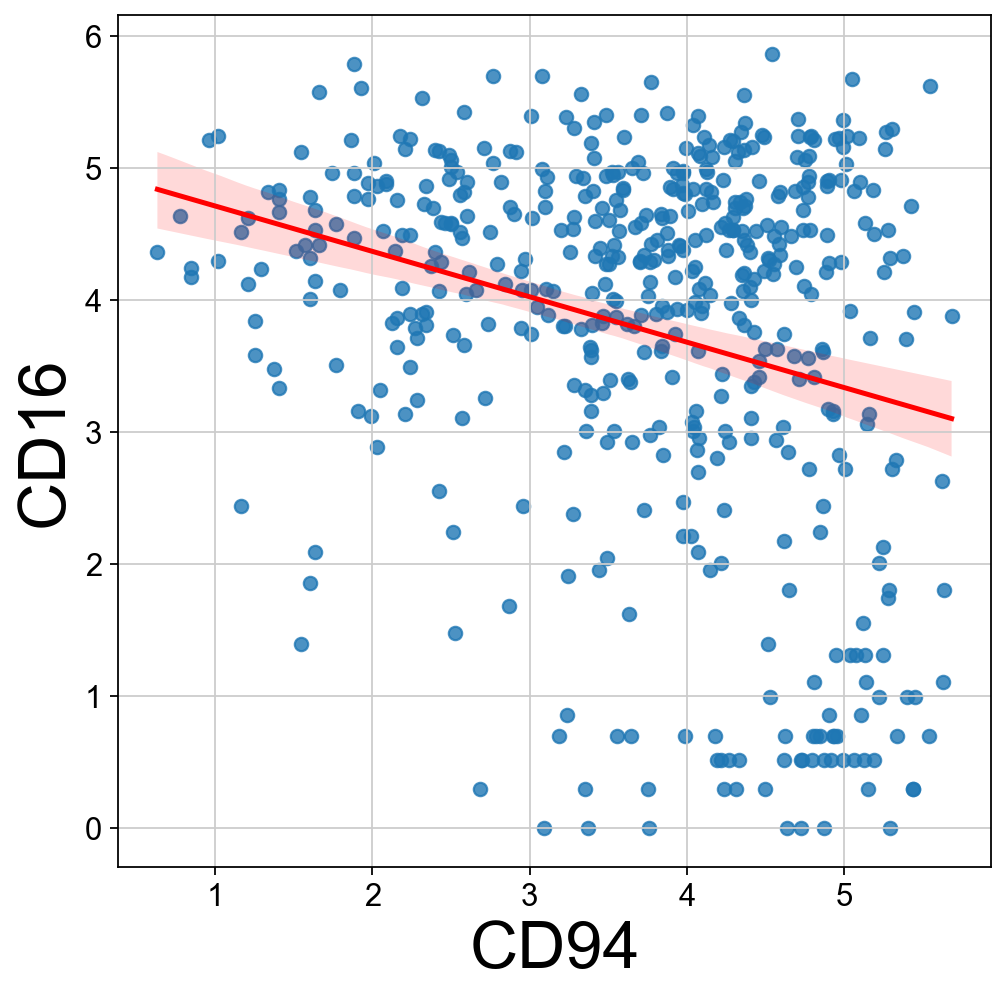

In [150]:
a = sns.regplot(data=df_comb_cd16, x='CD94' , y='CD16', 
                line_kws = {"color": "red"})
a.set_ylabel("CD16",fontsize=30)
a.set_xlabel("CD94",fontsize=30)

Text(0.5, 0, 'FCGR3A')

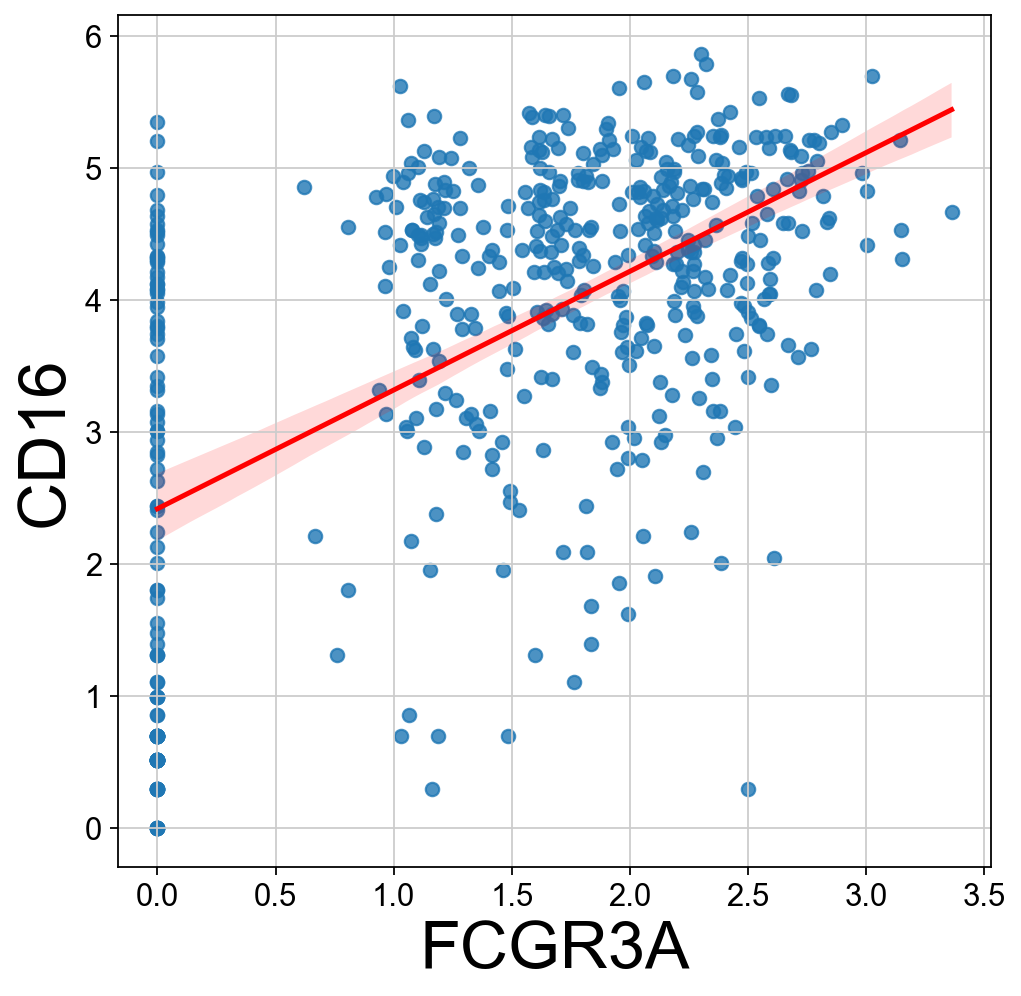

In [151]:
a = sns.regplot(data=df_comb_cd16, x='FCGR3A' , y='CD16', 
                line_kws = {"color": "red"})
a.set_ylabel("CD16",fontsize=30)
a.set_xlabel("FCGR3A",fontsize=30)

Text(0.5, 0, 'GZMK')

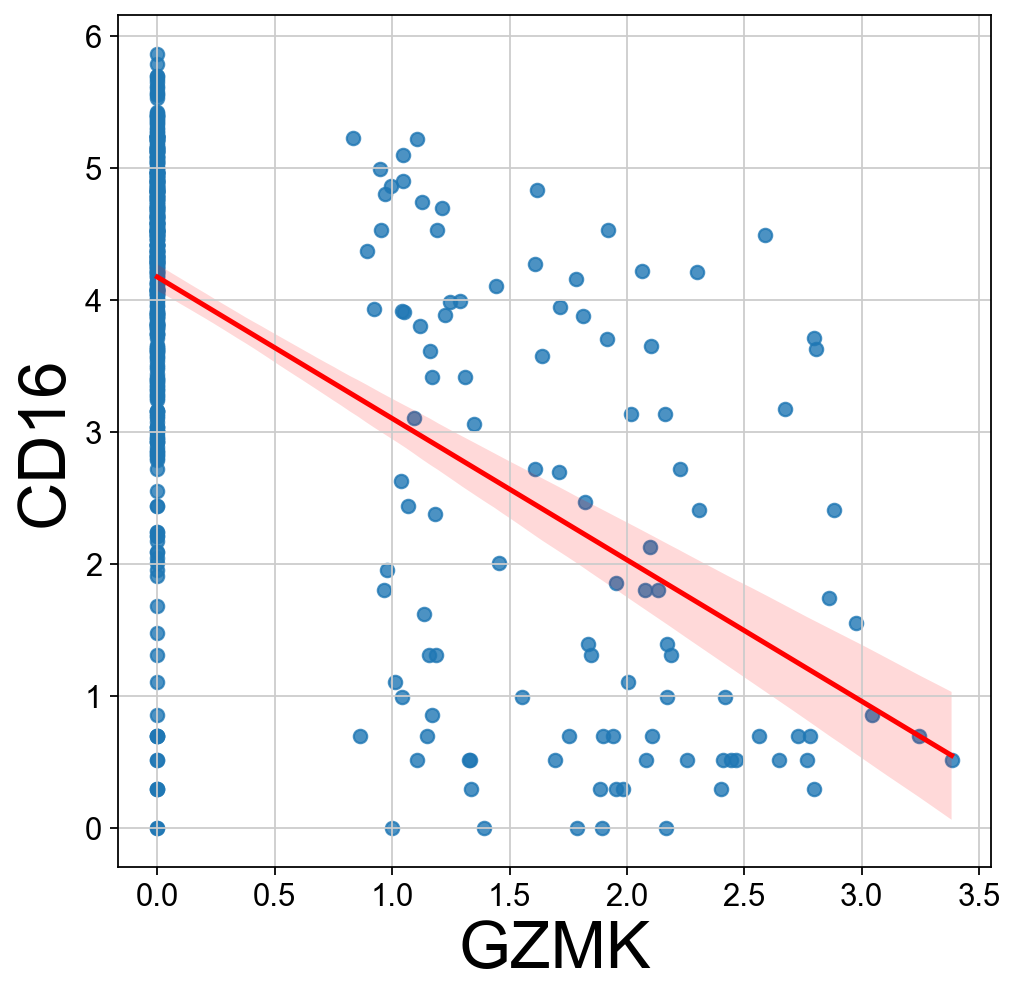

In [152]:
a = sns.regplot(data=df_comb_cd16, x='GZMK' , y='CD16', 
                line_kws = {"color": "red"})
a.set_ylabel("CD16",fontsize=30)
a.set_xlabel("GZMK",fontsize=30)

In [153]:
#df ordered by CD56

df_comb_cd56=df_comb.sort_values(by='CD56', ascending=True)

In [154]:
df_comb_cd56['CD56']

GCTTGGGGTTGTGTAC-1-s1d2    0.000000
TTCAGGAAGATCACTC-1-s1d2    0.189339
CACCGTTCATAGGCGA-1-s1d2    0.348471
TCTTAGTTCGTACACA-1-s1d2    0.485723
CGAAGGAGTGTCTAAC-1-s1d2    0.485723
                             ...   
TCCCAGTGTATCAGCT-1-s1d2    5.348458
ACACAGTGTAGGACTG-1-s1d2    5.386390
TCCCATGAGTCACACT-1-s1d2    5.433005
CCGGACAGTCCTACAA-1-s1d2    5.434825
TGTGCGGTCTACACAG-1-s1d2    5.443877
Name: CD56, Length: 518, dtype: float64

Text(0.5, 0, 'GZMB')

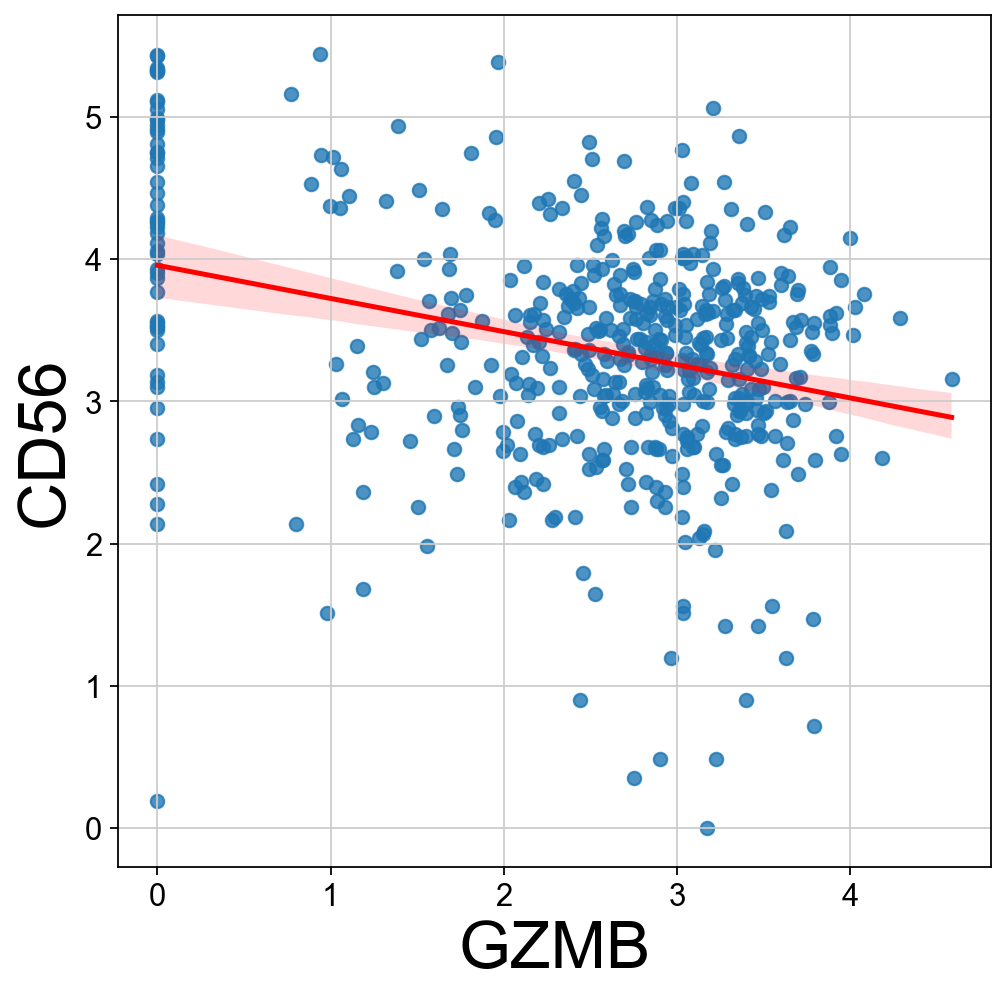

In [155]:
a = sns.regplot(data=df_comb_cd56, x='GZMB' , y='CD56', 
                line_kws = {"color": "red"})
a.set_ylabel("CD56",fontsize=30)
a.set_xlabel("GZMB",fontsize=30)

Text(0.5, 0, 'GZMK')

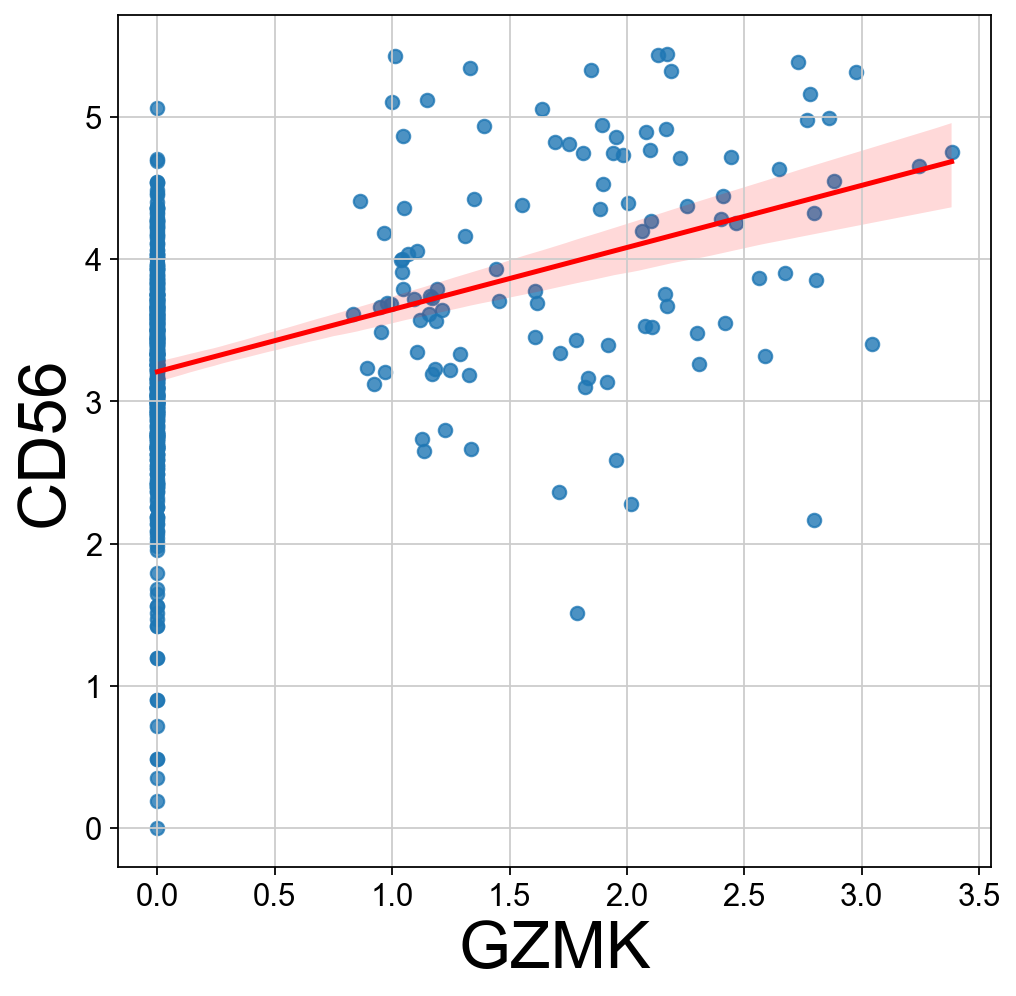

In [156]:
a = sns.regplot(data=df_comb_cd56, x='GZMK' , y='CD56', 
                line_kws = {"color": "red"})
a.set_ylabel("CD56",fontsize=30)
a.set_xlabel("GZMK",fontsize=30)

Text(0.5, 0, 'NCAM1')

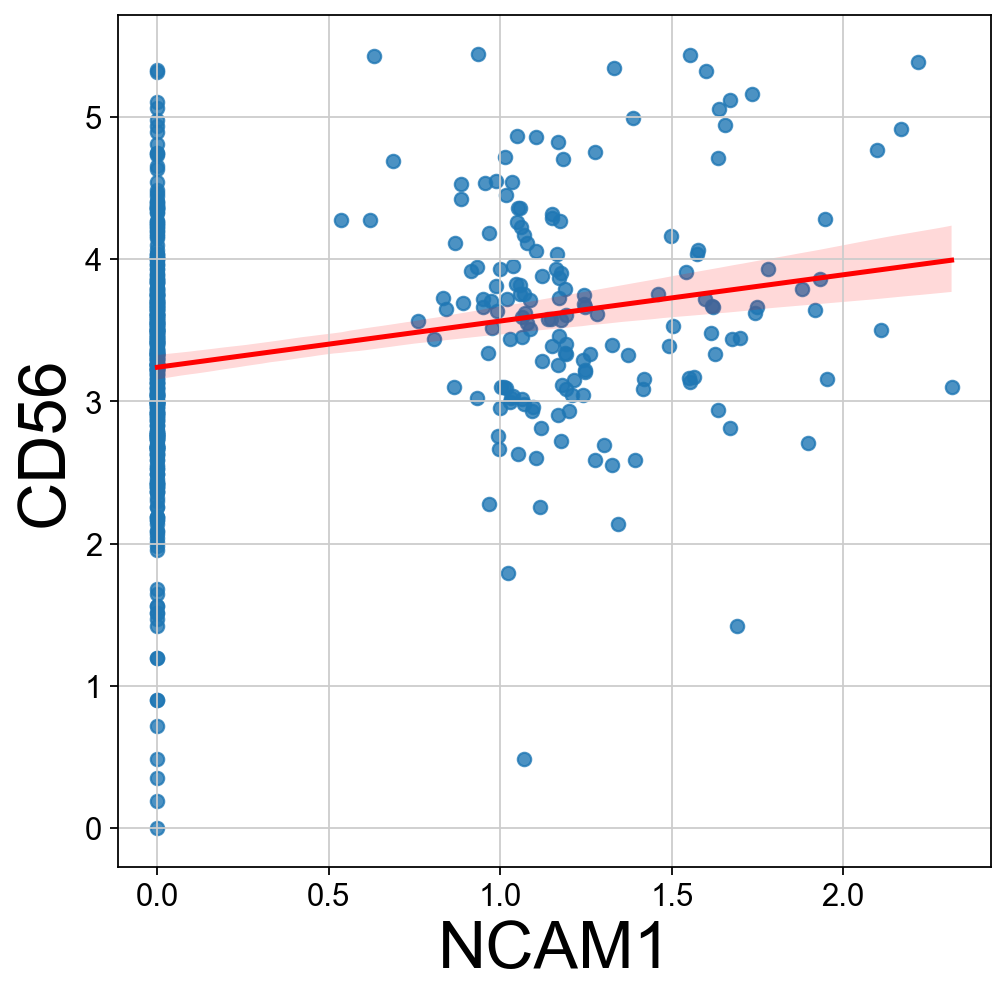

In [157]:
a = sns.regplot(data=df_comb_cd56, x='NCAM1' , y='CD56', 
                line_kws = {"color": "red"})
a.set_ylabel("CD56",fontsize=30)
a.set_xlabel("NCAM1",fontsize=30)

Text(0.5, 0, 'CD57')

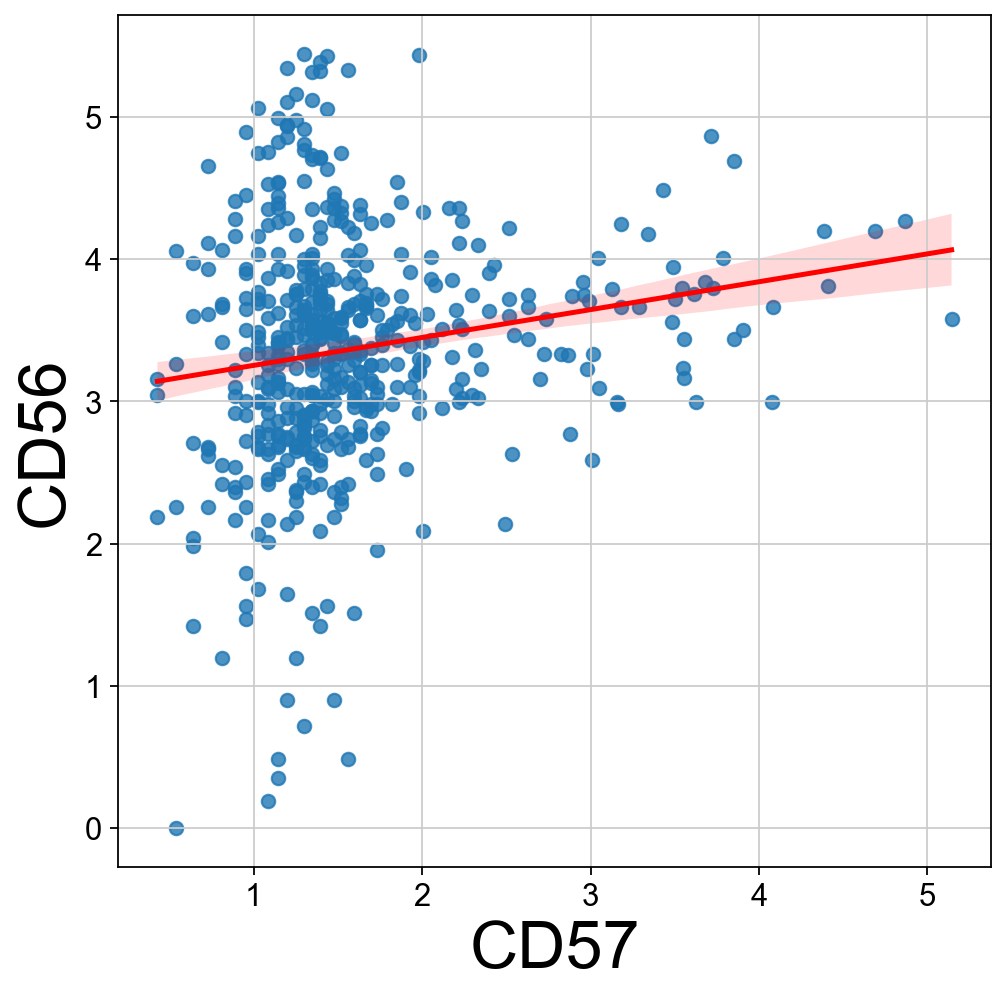

In [158]:
a = sns.regplot(data=df_comb_cd56, x='CD57' , y='CD56', 
                line_kws = {"color": "red"})
a.set_ylabel("CD56",fontsize=30)
a.set_xlabel("CD57",fontsize=30)